Adding 200 turf
Adding 100 one-walled-turf
Adding 30 two-walled-turf
Adding 3 three-walled-turf
Adding 40 water
Adding 15 treasure
Adding 20 trap
Adding 13 demon-lair

Board size: 441 (21x21)
Fixed slots: 49
Total tiles: 421
Unused tiles: 29


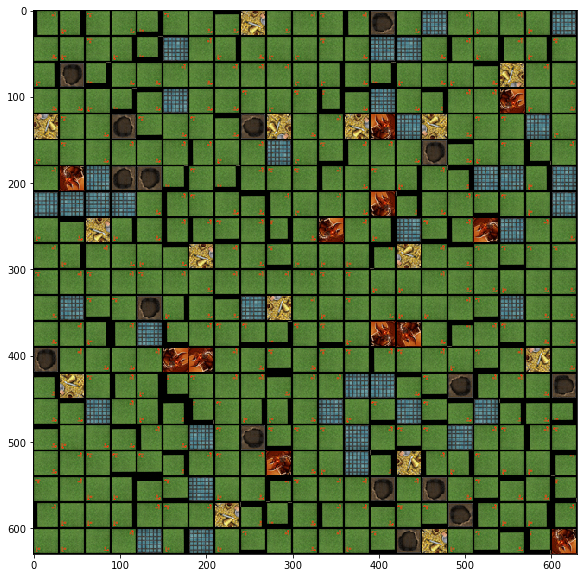

In [66]:
import matplotlib
from matplotlib.pyplot import imshow
import numpy as np
import random
from random import randrange
from configobj import ConfigObj
from PIL import Image

def random_rotation(image):
    """Returns a randomly rotated (possibly same) copy of an image"""
    return image.rotate(90*randrange(4))

# Read configuration
config = ConfigObj('config')

# The game board
tile_width = int(config['board']['tile-width'])
tile_height = int(config['board']['tile-height'])
board_width = int(config['board']['width'])
board_height = int(config['board']['height'])
board = Image.new(
    mode = 'RGBA', size=(board_width*tile_width,
        board_height*tile_height), color=(0, 0, 0, 0))

# Randomized tiles
tiles = []
for tile in config['tiles'].items():
    sprite = Image.open(tile[1]['sprite'])
    count = int(tile[1]['count'])
    print("Adding", count, tile[0])
    tiles.extend([sprite] * count)
random.shuffle(tiles)

# Fixed tiles
grey_tile = Image.open('./images/turf.jpg')
fixed_tiles = {(r, int(board_width/2)): grey_tile
        for r in range(board_height)}
fixed_tiles.update({(int(board_height/2), c): grey_tile
        for c in range(board_width)})
fixed_tiles.update({
    (0, 9): grey_tile,
    (0, 11): grey_tile,
    (20, 9): grey_tile,
    (20, 11): grey_tile,
    (9, 0): grey_tile,
    (11, 0): grey_tile,
    (9, 20): grey_tile,
    (11, 20): grey_tile,
    })

total_slots = board_height*board_width
fixed_slots = len(fixed_tiles)
assert len(tiles) >= (total_slots - fixed_slots), \
        "Not enough tiles to fill the board. Need " \
        + str(total_slots + fixed_slots - len(tiles)) \
        + " more."

# Metrics
print("\nBoard size:", total_slots,
      "(" + str(board_height) + "x" + str(board_width) + ")")
print("Fixed slots:", fixed_slots)
print("Total tiles:", len(tiles))
print("Unused tiles:", len(tiles) + fixed_slots - total_slots)

for row in range(board_height):
    for column in range(board_width):
        try:
            # Fixed tile
            tile = fixed_tiles[(row, column)]
        except KeyError:
            # Randomized tile
            tile = tiles.pop()

        tile = random_rotation(tile)
        board.paste(tile, (row*tile_height, column*tile_width))

#board.show() # Windowed preview
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 10)
imshow(np.asarray(board))